In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob 

In [18]:
# Read all 9 csv files
census_files = glob.glob('./Data/states*.csv')

df_list = []
for filename in census_files:
  data = pd.read_csv(filename)
  df_list.append(data)
us_census = pd.concat(df_list,  ignore_index=True)

In [19]:
#Useless column and interfeeres with the drop duplicates
us_census.drop('Unnamed: 0', inplace=True, axis=1)
print(us_census.columns)
print(us_census.dtypes)
print(us_census.head())

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object
        State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658% 

In [20]:
# Clean the income column (remove the $) and convert it into a number
us_census['Income'] = us_census['Income'].replace('[\$,]', '', regex=True)
us_census['Income'] = pd.to_numeric(us_census.Income)

In [21]:
print(us_census.Income.head())

0    43296.358603
1    70354.743902
2    54207.820955
3    41935.633968
4    67264.782303
Name: Income, dtype: float64


In [22]:
# Split Men and Women population
us_census['Men'] = us_census['GenderPop'].str.split('(_)', expand=True)[0]
us_census['Women'] = us_census['GenderPop'].str.split('(_)', expand=True)[2]
print(us_census.head())

        State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific        Income            GenderPop        Men  \
0  0.03435374149659865%  43296.358603    2341093M_2489527F   2341093M   
1   1.0586826347305378% 

In [23]:
# Remove the M of F character from the Men and Women's columns 
us_census['Men'] = us_census['Men'].replace('[M,]', '', regex=True)
us_census['Women'] = us_census['Women'].replace('[F,]', '', regex=True)

In [24]:
# Convert the Men and Women columns into a number
us_census['Men'] = pd.to_numeric(us_census.Men)
us_census['Women'] = pd.to_numeric(us_census.Women)
print(us_census.head())

        State  TotalPop             Hispanic                White  \
0     Alabama   4830620  3.7516156462584975%     61.878656462585%   
1      Alaska    733375   5.909580838323351%  60.910179640718574%   
2     Arizona   6641928  29.565921052631502%  57.120000000000026%   
3    Arkansas   2958208   6.215474452554738%   71.13781021897813%   
4  California  38421464  37.291874687968054%   40.21578881677474%   

                 Black                Native                Asian  \
0   31.25297619047618%   0.4532312925170065%  1.0502551020408146%   
1  2.8485029940119775%    16.39101796407186%   5.450299401197604%   
2  3.8509868421052658%     4.35506578947368%   2.876578947368419%   
3  18.968759124087573%   0.5229197080291965%  1.1423357664233578%   
4   5.677396405391911%  0.40529206190713685%  13.052234148776776%   

                Pacific        Income            GenderPop       Men  \
0  0.03435374149659865%  43296.358603    2341093M_2489527F   2341093   
1   1.0586826347305378%  7

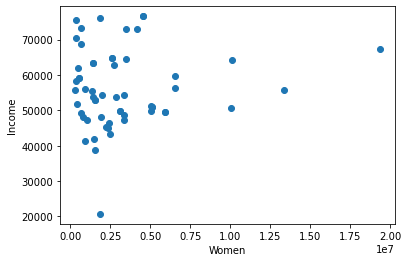

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23           NaN
24           NaN
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31           NaN
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

<Figure size 432x288 with 0 Axes>

In [25]:
#Plot Women's income
plt.scatter(us_census.Women, us_census.Income)
plt.xlabel('Women')
plt.ylabel('Income')
plt.show() 
plt.clf()
print(us_census['Women'])

In [26]:
#Replace the Women's Nan's values with the difference between TotalPop minus the Men's population
us_census['Women'] = us_census['Women'].fillna(us_census.TotalPop - us_census.Men)
print(us_census['Women'])

print(us_census.duplicated())

0      2489527.0
1       349215.0
2      3342840.0
3      1506295.0
4     19334329.0
5      2630239.0
6      2630239.0
7      1841615.0
8       478041.0
9       340810.0
10    10045763.0
11     5123362.0
12     5123362.0
13      696428.0
14      806083.0
15     6556862.0
16     3333382.0
17     1558931.0
18     1558931.0
19     1453125.0
20     2233145.0
21     2364097.0
22      679019.0
23     3057895.0
24     3057895.0
25     3455936.0
26     5038598.0
27     2727005.0
28     1536358.0
29     3081445.0
30     3081445.0
31      504536.0
32      939759.0
33     1390901.0
34      670717.0
35     4561386.0
36     4561386.0
37     1051703.0
38    10131373.0
39     5049925.0
40      353677.0
41     5913084.0
42     5913084.0
43     1942789.0
44     1990780.0
45     6534215.0
46     1869213.0
47      543273.0
48      543273.0
49     2455167.0
50      419713.0
51     3331859.0
52    13367298.0
53     1444150.0
54     1444150.0
55      318031.0
56     4195682.0
57     3497739.0
58      937789

In [27]:
# Remove suplicates I've had to drop a useless column before to be able to do this.
clean_us_census = us_census.drop_duplicates()

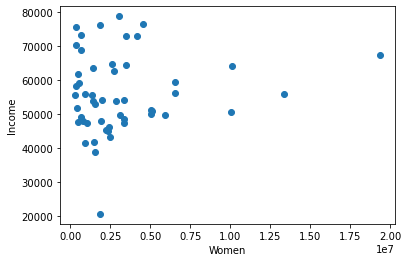

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')


<Figure size 432x288 with 0 Axes>

In [28]:
# Plot WOmen's income again with clean data
plt.scatter(clean_us_census.Women, clean_us_census.Income)
plt.xlabel('Women')
plt.ylabel('Income')
plt.show() 
plt.clf()
print(clean_us_census.columns)

In [30]:
#Create a function to clean column data. Replace a string and convert into a number.
def clean_column(df, columns, string):
  for column in columns:
    df[column] = df[column].replace(string, '', regex=True)
    df[column] = pd.to_numeric(df[column])
  return df

In [31]:
# Create a list of races or PC Ehtnicities to clean the data for  
columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

# Call function to clean data
clean_us_census = clean_column(clean_us_census, columns, '[\%,]')

#Calculate the missing Pacific ehtnic data
nan_pacific = 100 - clean_us_census.White - clean_us_census.Hispanic - clean_us_census.Black - clean_us_census.Asian

# Replace the Pacific ehtnicity % with real data
clean_us_census['Pacific'] = clean_us_census.Pacific.fillna(value=nan_pacific)

# Drop duplicates just in case
final_us_census = clean_us_census.drop_duplicates()
print(final_us_census)

                   State  TotalPop   Hispanic      White      Black  \
0                Alabama   4830620   3.751616  61.878656  31.252976   
1                 Alaska    733375   5.909581  60.910180   2.848503   
2                Arizona   6641928  29.565921  57.120000   3.850987   
3               Arkansas   2958208   6.215474  71.137810  18.968759   
4             California  38421464  37.291875  40.215789   5.677396   
5               Colorado   5278906  20.784380  69.895572   3.546377   
7            Connecticut   3593222  15.604831  67.677053  10.348068   
8               Delaware    926454   8.824766  64.632710  20.743925   
9   District of Columbia    647484   9.165922  33.103911  51.776536   
10               Florida  19645772  21.338543  59.083749  15.165676   
11               Georgia  10006693   8.418242  54.286306  32.088298   
13                Hawaii   1406299   9.186709  25.032278   2.052848   
14                 Idaho   1616547  11.505369  83.136242   0.566779   
15    

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [32]:
#Create function to plot different columns
def print_histogram(df, columns):
  for column in columns:
    plt.hist(df[column])
    plt.title('Figure : ' + column)
    plt.show()
    plt.clf()

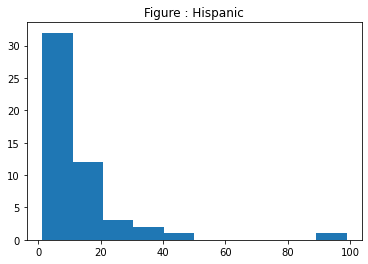

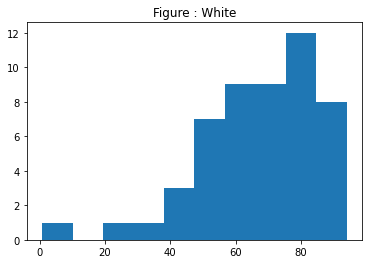

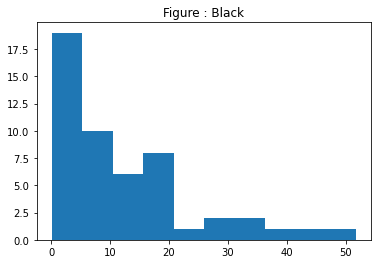

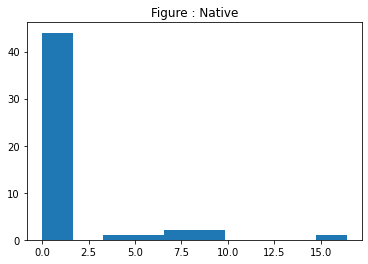

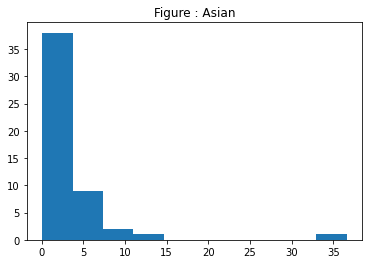

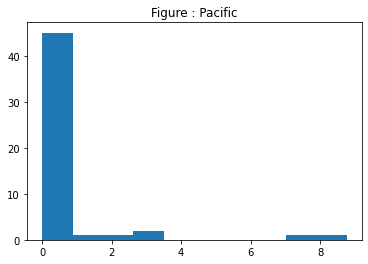

<Figure size 432x288 with 0 Axes>

In [33]:
# Create a list of columns to plot
columns = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']

# call function to plot a list of columns
print_histogram(final_us_census, columns)